<a href="https://colab.research.google.com/github/mrrkdas/Mini-Projects/blob/main/CNN_with_tf_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout, Normalization, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, load_model

In [3]:
split = ['train[:70%]', 'train[70%:]']

In [4]:
train_data, test_data = tfds.load(name = "tf_flowers", split = split, as_supervised = True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]


Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [5]:
classes = ['dandelion', 'daisy', 'tulip', 'sunflower', 'rose']

## Getting to know the data

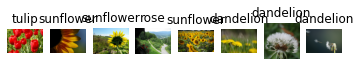

In [6]:
i = 0
fig, ax = plt.subplots(1, 8)
for image, label in train_data.take(8):
    ax[i].axis('off')
    ax[i].set_title(classes[label])
    ax[i].imshow(image)
    i += 1
 
plt.show()

## Preprocessing

In [7]:
def preprocess(img, label, HEIGHT=250, WIDTH = 250):
  return tf.image.resize(img, [HEIGHT, WIDTH]) / 255, label

In [8]:
train_data = train_data.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
test_data = test_data.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

## Model

In [9]:
input = Input((250, 250, 3))

conv1 = Conv2D(64, (2,2), activation = 'relu')

x = conv1(input) 
x = MaxPool2D((2,2)) (x)
x = Conv2D(32, (3,3), activation = 'relu') (x)
x = MaxPool2D((2,2)) (x)
x = Conv2D(32, (3,3), activation = 'relu') (x)
x = MaxPool2D((2,2)) (x)
x = Flatten() (x)
x = Dense(64, activation = 'relu') (x)
x = Dense(32, activation = 'relu') (x)

output = Dense(5, activation = 'softmax') (x)

model = Model(input, output)

In [10]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['sparse_categorical_accuracy'])

In [11]:
r = model.fit(train_data, epochs = 30, validation_data = test_data, batch_size = 32, validation_batch_size = 32) 

Epoch 1/30
81/81 [==============================] - 31s 208ms/step - loss: 1.3449 - sparse_categorical_accuracy: 0.4087 - val_loss: 1.1120 - val_sparse_categorical_accuracy: 0.5559
Epoch 2/30
81/81 [==============================] - 13s 160ms/step - loss: 1.0277 - sparse_categorical_accuracy: 0.5948 - val_loss: 1.0404 - val_sparse_categorical_accuracy: 0.6131
Epoch 3/30
81/81 [==============================] - 13s 162ms/step - loss: 0.8919 - sparse_categorical_accuracy: 0.6652 - val_loss: 1.0011 - val_sparse_categorical_accuracy: 0.6276
Epoch 4/30
81/81 [==============================] - 13s 163ms/step - loss: 0.6793 - sparse_categorical_accuracy: 0.7610 - val_loss: 1.1664 - val_sparse_categorical_accuracy: 0.6158
Epoch 5/30
81/81 [==============================] - 13s 156ms/step - loss: 0.5110 - sparse_categorical_accuracy: 0.8081 - val_loss: 1.1470 - val_sparse_categorical_accuracy: 0.6303
Epoch 6/30
81/81 [==============================] - 13s 161ms/step - loss: 0.3451 - sparse_cate

## After Model

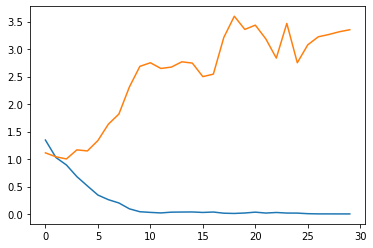

In [12]:
# Loss
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')

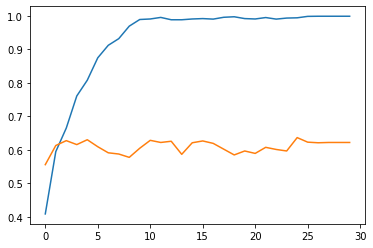

In [13]:
# Accuracy
plt.plot(r.history['sparse_categorical_accuracy'])
plt.plot(r.history['val_sparse_categorical_accuracy'])

In [14]:
model.evaluate(test_data)

35/35 [==============================] - 2s 57ms/step - loss: 3.3506 - sparse_categorical_accuracy: 0.6222


[3.350594997406006, 0.6221616864204407]

In [15]:
preds = model.predict(test_data)

In [24]:
for i in range(len(preds)):
  print(f"Predicted {classes[preds[i].argmax()]}")

Predicted tulip
Predicted dandelion
Predicted daisy
Predicted sunflower
Predicted dandelion
Predicted sunflower
Predicted daisy
Predicted sunflower
Predicted sunflower
Predicted daisy
Predicted dandelion
Predicted daisy
Predicted daisy
Predicted tulip
Predicted rose
Predicted sunflower
Predicted sunflower
Predicted rose
Predicted dandelion
Predicted dandelion
Predicted daisy
Predicted tulip
Predicted rose
Predicted tulip
Predicted sunflower
Predicted dandelion
Predicted sunflower
Predicted sunflower
Predicted sunflower
Predicted sunflower
Predicted dandelion
Predicted rose
Predicted rose
Predicted daisy
Predicted daisy
Predicted rose
Predicted sunflower
Predicted daisy
Predicted dandelion
Predicted dandelion
Predicted sunflower
Predicted dandelion
Predicted tulip
Predicted sunflower
Predicted daisy
Predicted dandelion
Predicted sunflower
Predicted daisy
Predicted tulip
Predicted sunflower
Predicted dandelion
Predicted tulip
Predicted dandelion
Predicted tulip
Predicted sunflower
Predic

In [18]:
model.save('tf_flowers_model')

INFO:tensorflow:Assets written to: tf_flowers_model/assets


INFO:tensorflow:Assets written to: tf_flowers_model/assets


In [20]:
new_model = load_model('tf_flowers_model')

In [21]:
new_preds = new_model.predict(test_data)

In [23]:
for i in range(len(new_preds)):
  print(f"Predicted {classes[new_preds[i].argmax()]}")

Predicted tulip
Predicted dandelion
Predicted daisy
Predicted sunflower
Predicted dandelion
Predicted sunflower
Predicted daisy
Predicted sunflower
Predicted sunflower
Predicted daisy
Predicted dandelion
Predicted daisy
Predicted daisy
Predicted tulip
Predicted rose
Predicted sunflower
Predicted sunflower
Predicted rose
Predicted dandelion
Predicted dandelion
Predicted daisy
Predicted tulip
Predicted rose
Predicted tulip
Predicted sunflower
Predicted dandelion
Predicted sunflower
Predicted sunflower
Predicted sunflower
Predicted sunflower
Predicted dandelion
Predicted rose
Predicted rose
Predicted daisy
Predicted daisy
Predicted rose
Predicted sunflower
Predicted daisy
Predicted dandelion
Predicted dandelion
Predicted sunflower
Predicted dandelion
Predicted tulip
Predicted sunflower
Predicted daisy
Predicted dandelion
Predicted sunflower
Predicted daisy
Predicted tulip
Predicted sunflower
Predicted dandelion
Predicted tulip
Predicted dandelion
Predicted tulip
Predicted sunflower
Predic